In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#comment back in if restarting the kernel
# df = pd.read_excel('../3_res/freshmen.xlsx')

In [3]:
df.head()

,idnumber,gender,religiouspreference,hispanicyesno,withdrawflag,ethnicity,address_01_city,address_01_stateprovince,address_01_postalcode,address_01_countryregion,entryterm,housing,academicmajor,secondacademicarea,highschoolceebcode,hsgpa,actscore,satscore,campusvisitdate,initialsourcecode,dateoffirstcontact,extracurricularinterest,athletics,app:submitteddate,app:completedate,admit:unconditionaldate,admit:conditionaldate,app:withdrawdate,app:withdrawinstitutiondate,app:deferdate,app:denydate,deposit:paiddate,deposit:withdrawndate,enrollmentdate,initialenrollmentstatus,highschooldescription,firstsourceapp,completeapp,applicationmethod,birthday,highschool,campusvisit
0,251249480,NaN,NaN,No,NaN,Race/Ethnicity Unknown,Bellefonte,PA,16823-1716,United States,17 Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NRCCUA,08/25/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/16/1998,Missing,0
1,182423288,F,NaN,NaN,NaN,Race/Ethnicity Unknown,Picayune,MS,39466-9456,United States,17 Fall,NaN,NaN,Undecided,250465,NaN,18.0,NaN,NaN,ACT,05/02/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pearl River Central High School,NaN,NaN,NaN,06/22/1998,Pearl River Central High School (250465),0
2,953769515,F,NaN,No,NaN,White,Round Rock,TX,78665-1359,United States,17 Fall,NaN,NaN,Fine Arts/ Studio Arts,NaN,NaN,NaN,NaN,NaN,NRCCUA,08/25/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/30/1999,Missing,0
3,540683149,M,NaN,Yes,NaN,Hispanic of any race,Richmond,TX,77406-6766,United States,17 Fall,NaN,NaN,Journalism,445856,NaN,NaN,NaN,NaN,NRCCUA,08/25/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foster High School,NaN,NaN,NaN,12/17/1998,Foster High School (445856),0
4,98836834,F,NaN,No,NaN,Black or African American,Grand Prairie,TX,75052-4138,United States,17 Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NRCCUA,01/14/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/30/1999,Missing,0


In [4]:
df['idnumber'].count() - df['enrollmentdate'].count()

636758

In [5]:
freshmen=df

In [6]:
freshmen['inquiry']=1

In [7]:
freshmen['applied']=0
freshmen['applied'][pd.notna(freshmen['app:submitteddate'])]=1
print('Number of Freshmen')
print(freshmen['inquiry'].count())
print('Number of Applicants')
print(freshmen['applied'][freshmen['applied']==1].count())
print('Inquiry to Applicant Rate')
print((freshmen['applied'][freshmen['applied']==1].count())/(freshmen['inquiry'].count()))

freshmen['admitted']=0
freshmen['admitted'][pd.notna(freshmen['admit:unconditionaldate']) | pd.notna(freshmen['admit:conditionaldate'])]=1
print('Number of Admitted')
print(freshmen['admitted'][freshmen['admitted']==1].count())
print('Applicant to Admitted Rate')
print((freshmen['admitted'][freshmen['admitted']==1].count())/(freshmen['applied'][freshmen['applied']==1].count()))

freshmen['enrolled']=0
freshmen['enrolled'][pd.notna(freshmen['enrollmentdate'])] = 1
print('Number of Enrolled')
print(freshmen['enrolled'][freshmen['enrolled']==1].count())
print('Applicant to Enrolled Rate')
print((freshmen['enrolled'][freshmen['enrolled']==1].count())/(freshmen['applied'][freshmen['applied']==1].count()))
print('Admitted to Enrolled Rate')
print((freshmen['enrolled'][freshmen['enrolled']==1].count())/(freshmen['admitted'][freshmen['admitted']==1].count()))

Number of Freshmen
639131
Number of Applicants
16118
Inquiry to Applicant Rate
0.02521861715360388
Number of Admitted
11268
Applicant to Admitted Rate
0.6990941804194069
Number of Enrolled
2373
Applicant to Enrolled Rate
0.14722670306489638
Admitted to Enrolled Rate
0.21059637912673057


# Check variables

In [8]:
print(freshmen['housing'][freshmen['applied']==1].value_counts(dropna=False))
print(freshmen['housing'][freshmen['admitted']==1].value_counts(dropna=False))
 #not useful - drop
freshmen.drop(['housing'], axis=1, inplace=True)

NaN           14614
On Campus      1221
Off Campus      283
Name: housing, dtype: int64
NaN           9764
On Campus     1221
Off Campus     283
Name: housing, dtype: int64


In [9]:
#print(freshmen['academicmajor'][freshmen['applied']==1].value_counts(dropna=False))
#print(freshmen['academicmajor'][freshmen['admitted']==1].value_counts(dropna=False))

print(freshmen['idnumber'][(freshmen['applied']==1) & (pd.isna(freshmen['academicmajor']))].count())
print(freshmen['idnumber'][(freshmen['admitted']==1) & (pd.isna(freshmen['academicmajor']))].count())

freshmen['academicmajor'][pd.isna(freshmen['academicmajor'])]='Missing'

# All applicants, barring 19 have a major. Can use that as a key variable in the final analysis - keep

19
0


In [10]:
# freshmen[(freshmen['applied']==1) & (freshmen['academicmajor'] == 'Missing')]

In [11]:
print(freshmen['secondacademicarea'][freshmen['applied']==1].value_counts(dropna=False))
print(freshmen['secondacademicarea'][freshmen['admitted']==1].value_counts(dropna=False))
#drop
freshmen.drop(['secondacademicarea'], axis=1, inplace=True)

NaN    16118
Name: secondacademicarea, dtype: int64
NaN    11268
Name: secondacademicarea, dtype: int64


In [12]:
print(freshmen['idnumber'][(freshmen['applied']==1) & (pd.isna(freshmen['hsgpa']))].count())
print(freshmen['idnumber'][(freshmen['admitted']==1) & (pd.isna(freshmen['hsgpa']))].count())
#drop - hsgpa only useful for admitted
freshmen.drop(['hsgpa'], axis=1, inplace=True)

3080
4


In [13]:
print(freshmen['idnumber'][(freshmen['applied']==1) & (pd.isna(freshmen['actscore']))].count())
print(freshmen['idnumber'][(freshmen['admitted']==1) & (pd.isna(freshmen['actscore']))].count())

freshmen['actscore'].describe()
#most have act scores

7684
4179


count    16647.000000
mean        22.775155
std          5.331346
min          2.000000
25%         19.000000
50%         23.000000
75%         27.000000
max         36.000000
Name: actscore, dtype: float64

In [14]:
print(freshmen['idnumber'][(freshmen['applied']==1) & (pd.isna(freshmen['satscore']))].count())
print(freshmen['idnumber'][(freshmen['admitted']==1) & (pd.isna(freshmen['satscore']))].count())

freshmen['satscore'].describe()
# Lesser number have sat Available for all applicants - convert sat to act

10169
6335


count    6568.000000
mean     1156.934379
std       151.329270
min       570.000000
25%      1060.000000
50%      1160.000000
75%      1260.000000
max      1580.000000
Name: satscore, dtype: float64

***Convert SAT to ACT***

In [15]:
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 620) & (freshmen['satscore'] > 550)] = 11
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 710) & (freshmen['satscore'] > 620)] = 12
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 750) & (freshmen['satscore'] > 710)] = 13
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 800) & (freshmen['satscore'] > 750)] = 14
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 850) & (freshmen['satscore'] > 800)] = 15
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 890) & (freshmen['satscore'] > 850)] = 16
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 930) & (freshmen['satscore'] > 890)] = 17
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 970) & (freshmen['satscore'] > 930)] = 18
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 1010) & (freshmen['satscore'] > 970)] = 19
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 1050) & (freshmen['satscore'] > 1010)] = 20
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 1090) & (freshmen['satscore'] > 1050)] = 21
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 1120) & (freshmen['satscore'] > 1090)] = 22
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 1150) & (freshmen['satscore'] > 1120)] = 23
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 1190) & (freshmen['satscore'] > 1150)] = 24
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 1230) & (freshmen['satscore'] > 1190)] = 25
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 1270) & (freshmen['satscore'] > 1230)] = 26
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 1300) & (freshmen['satscore'] > 1270)] = 27
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 1340) & (freshmen['satscore'] > 1300)] = 28
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 1380) & (freshmen['satscore'] > 1340)] = 29
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 1410) & (freshmen['satscore'] > 1380)] = 30
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 1440) & (freshmen['satscore'] > 1410)] = 31
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 1480) & (freshmen['satscore'] > 1440)] = 32
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 1510) & (freshmen['satscore'] > 1480)] = 33
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 1550) & (freshmen['satscore'] > 1510)] = 34
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] <= 1590) & (freshmen['satscore'] > 1550)] = 35
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']!="19Fall") & 
                     (freshmen['satscore'] ==1600)] = 36


In [16]:
#Assuming all 2019 students took 2018 and after SAT
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 610) & (freshmen['satscore'] > 550)] = 9
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 640) & (freshmen['satscore'] > 610)] = 10
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 680) & (freshmen['satscore'] > 640)] = 11
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 720) & (freshmen['satscore'] > 680)] = 12
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 770) & (freshmen['satscore'] > 720)] = 13
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 820) & (freshmen['satscore'] > 770)] = 14
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 870) & (freshmen['satscore'] > 820)] = 15
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 910) & (freshmen['satscore'] > 870)] = 16
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 950) & (freshmen['satscore'] > 910)] = 17
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 980) & (freshmen['satscore'] > 950)] = 18
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 1020) & (freshmen['satscore'] > 980)] = 19
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 1050) & (freshmen['satscore'] > 1020)] = 20
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 1090) & (freshmen['satscore'] > 1050)] = 21
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 1120) & (freshmen['satscore'] > 1090)] = 22
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 1150) & (freshmen['satscore'] > 1120)] = 23
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 1190) & (freshmen['satscore'] > 1150)] = 24
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 1220) & (freshmen['satscore'] > 1190)] = 25
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 1250) & (freshmen['satscore'] > 1220)] = 26
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 1290) & (freshmen['satscore'] > 1250)] = 27
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 1320) & (freshmen['satscore'] > 1290)] = 28
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 1350) & (freshmen['satscore'] > 1320)] = 29
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 1380) & (freshmen['satscore'] > 1350)] = 30
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 1410) & (freshmen['satscore'] > 1380)] = 31
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 1440) & (freshmen['satscore'] > 1410)] = 32
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 1480) & (freshmen['satscore'] > 1440)] = 33
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 1520) & (freshmen['satscore'] > 1480)] = 34
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 1560) & (freshmen['satscore'] > 1520)] = 35
freshmen['actscore'][(pd.isna(freshmen['actscore'])) & (freshmen['entryterm']=="19Fall") & 
                     (freshmen['satscore'] <= 1600) & (freshmen['satscore'] > 1560)] = 36
freshmen['actscore'].describe()

# https://mytutor.com/wp-content/uploads/2018/06/sat-act-concordance-chart-2016-v-2018-rev.pdf

count    22101.000000
mean        22.890865
std          5.048439
min          2.000000
25%         19.000000
50%         23.000000
75%         27.000000
max         36.000000
Name: actscore, dtype: float64

In [17]:
freshmen.drop(['satscore'], axis=1, inplace=True)
freshmen.head()

,idnumber,gender,religiouspreference,hispanicyesno,withdrawflag,ethnicity,address_01_city,address_01_stateprovince,address_01_postalcode,address_01_countryregion,entryterm,academicmajor,highschoolceebcode,actscore,campusvisitdate,initialsourcecode,dateoffirstcontact,extracurricularinterest,athletics,app:submitteddate,app:completedate,admit:unconditionaldate,admit:conditionaldate,app:withdrawdate,app:withdrawinstitutiondate,app:deferdate,app:denydate,deposit:paiddate,deposit:withdrawndate,enrollmentdate,initialenrollmentstatus,highschooldescription,firstsourceapp,completeapp,applicationmethod,birthday,highschool,campusvisit,inquiry,applied,admitted,enrolled
0,251249480,NaN,NaN,No,NaN,Race/Ethnicity Unknown,Bellefonte,PA,16823-1716,United States,17 Fall,Missing,NaN,NaN,NaN,NRCCUA,08/25/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/16/1998,Missing,0,1,0,0,0
1,182423288,F,NaN,NaN,NaN,Race/Ethnicity Unknown,Picayune,MS,39466-9456,United States,17 Fall,Missing,250465,18.0,NaN,ACT,05/02/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pearl River Central High School,NaN,NaN,NaN,06/22/1998,Pearl River Central High School (250465),0,1,0,0,0
2,953769515,F,NaN,No,NaN,White,Round Rock,TX,78665-1359,United States,17 Fall,Missing,NaN,NaN,NaN,NRCCUA,08/25/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/30/1999,Missing,0,1,0,0,0
3,540683149,M,NaN,Yes,NaN,Hispanic of any race,Richmond,TX,77406-6766,United States,17 Fall,Missing,445856,NaN,NaN,NRCCUA,08/25/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foster High School,NaN,NaN,NaN,12/17/1998,Foster High School (445856),0,1,0,0,0
4,98836834,F,NaN,No,NaN,Black or African American,Grand Prairie,TX,75052-4138,United States,17 Fall,Missing,NaN,NaN,NaN,NRCCUA,01/14/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/30/1999,Missing,0,1,0,0,0


***Check Other Variables***

In [18]:
freshmen['gender'].value_counts(dropna=False)

F      357533
M      248376
NaN     33166
O          56
Name: gender, dtype: int64

In [19]:
freshmen['gender'][(freshmen['gender']=='O') | (pd.isna(freshmen['gender']))]='Missing'
freshmen['gender'].value_counts()

F          357533
M          248376
Missing     33222
Name: gender, dtype: int64

In [20]:
print(freshmen['idnumber'][pd.isna(freshmen['religiouspreference'])].count())
print(freshmen['idnumber'][(pd.isna(freshmen['religiouspreference'])) & (freshmen['applied']==1)].count())
print(freshmen['idnumber'][(pd.isna(freshmen['religiouspreference'])) & (freshmen['admitted']==1)].count())
print(freshmen['idnumber'][(pd.isna(freshmen['religiouspreference'])) & (freshmen['enrolled']==1)].count())

613223
3112
1995
401


In [21]:
freshmen['religiouspreference'].value_counts(dropna=False)

NaN                                  613223
Christian – Catholic                  10009
Christian – Baptist                    4281
None                                   3718
Christian – Other                      2428
Other                                  1286
Christian – Church of Christ            834
Christian – Methodist                   649
Muslim                                  393
Jewish                                  377
Christian – Pentacostal                 366
Christian – Episcopal (Anglican)        326
Buddhist                                233
Christian – Presbyterian                224
Christian – Lutheran                    203
Hindu                                   116
Christian – Reformed                     94
Christian – Seventh Day Adventist        59
Christian – LDS (Mormon)                 57
Christian – Orthodox                     45
Unitarian Universalist                   44
Christian – Christian Scientist          36
Pagan                           

In [22]:
freshmen['religion']=""
freshmen['religiouspreference'][pd.isna(freshmen['religiouspreference'])]='Missing'
freshmen['religion'][freshmen['religiouspreference'].str.contains('Christian')] = 'Christian'
freshmen['religion'][freshmen['religiouspreference']=='Missing']='Missing'
freshmen['religion'][freshmen['religion']==""]="Other"
freshmen['religion'].value_counts(dropna=False)

Missing      613223
Christian     19677
Other          6231
Name: religion, dtype: int64

In [23]:
freshmen.drop(['religiouspreference'], axis = 1, inplace = True)
freshmen.head()

,idnumber,gender,hispanicyesno,withdrawflag,ethnicity,address_01_city,address_01_stateprovince,address_01_postalcode,address_01_countryregion,entryterm,academicmajor,highschoolceebcode,actscore,campusvisitdate,initialsourcecode,dateoffirstcontact,extracurricularinterest,athletics,app:submitteddate,app:completedate,admit:unconditionaldate,admit:conditionaldate,app:withdrawdate,app:withdrawinstitutiondate,app:deferdate,app:denydate,deposit:paiddate,deposit:withdrawndate,enrollmentdate,initialenrollmentstatus,highschooldescription,firstsourceapp,completeapp,applicationmethod,birthday,highschool,campusvisit,inquiry,applied,admitted,enrolled,religion
0,251249480,Missing,No,NaN,Race/Ethnicity Unknown,Bellefonte,PA,16823-1716,United States,17 Fall,Missing,NaN,NaN,NaN,NRCCUA,08/25/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/16/1998,Missing,0,1,0,0,0,Missing
1,182423288,F,NaN,NaN,Race/Ethnicity Unknown,Picayune,MS,39466-9456,United States,17 Fall,Missing,250465,18.0,NaN,ACT,05/02/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pearl River Central High School,NaN,NaN,NaN,06/22/1998,Pearl River Central High School (250465),0,1,0,0,0,Missing
2,953769515,F,No,NaN,White,Round Rock,TX,78665-1359,United States,17 Fall,Missing,NaN,NaN,NaN,NRCCUA,08/25/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/30/1999,Missing,0,1,0,0,0,Missing
3,540683149,M,Yes,NaN,Hispanic of any race,Richmond,TX,77406-6766,United States,17 Fall,Missing,445856,NaN,NaN,NRCCUA,08/25/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foster High School,NaN,NaN,NaN,12/17/1998,Foster High School (445856),0,1,0,0,0,Missing
4,98836834,F,No,NaN,Black or African American,Grand Prairie,TX,75052-4138,United States,17 Fall,Missing,NaN,NaN,NaN,NRCCUA,01/14/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/30/1999,Missing,0,1,0,0,0,Missing


In [24]:
freshmen.ethnicity.value_counts(dropna=False)

Race/Ethnicity Unknown                       270695
White                                        172673
Hispanic of any race                          90702
Black or African American                     54041
Asian                                         32129
Two or more races                             12465
American Indian or Alaska Native               3988
Nonresident Alien                              2177
Native Hawaiian or Other Pacific                133
Native Hawaiian or Other Pacific Islander       123
Other                                             5
Name: ethnicity, dtype: int64

In [25]:
freshmen['ethnicity'][freshmen['hispanicyesno']=='Yes'].value_counts(dropna=False)

Hispanic of any race    90702
Nonresident Alien         607
Name: ethnicity, dtype: int64

In [26]:
freshmen.drop(['hispanicyesno'], axis = 1, inplace=True)

In [27]:
freshmen['ethnicity'][freshmen['ethnicity']=='Native Hawaiian or Other Pacific'] = 'Native Hawaiian or Other Pacific Islander'
freshmen['ethnicity'][freshmen['ethnicity']=='Nonresident Alien'] = 'Other'
freshmen['ethnicity'][freshmen['ethnicity']=='Race/Ethnicity Unknown']='Missing'
freshmen.ethnicity.value_counts(dropna=False)

Missing                                      270695
White                                        172673
Hispanic of any race                          90702
Black or African American                     54041
Asian                                         32129
Two or more races                             12465
American Indian or Alaska Native               3988
Other                                          2182
Native Hawaiian or Other Pacific Islander       256
Name: ethnicity, dtype: int64

In [28]:
freshmen.withdrawflag.value_counts(dropna=False)

NaN    594307
W       44824
Name: withdrawflag, dtype: int64

In [29]:
freshmen['withdrawflag'][pd.isna(freshmen['withdrawflag'])]='N'
freshmen.withdrawflag.value_counts(dropna=False)

N    594307
W     44824
Name: withdrawflag, dtype: int64

In [30]:
freshmen.head()

,idnumber,gender,withdrawflag,ethnicity,address_01_city,address_01_stateprovince,address_01_postalcode,address_01_countryregion,entryterm,academicmajor,highschoolceebcode,actscore,campusvisitdate,initialsourcecode,dateoffirstcontact,extracurricularinterest,athletics,app:submitteddate,app:completedate,admit:unconditionaldate,admit:conditionaldate,app:withdrawdate,app:withdrawinstitutiondate,app:deferdate,app:denydate,deposit:paiddate,deposit:withdrawndate,enrollmentdate,initialenrollmentstatus,highschooldescription,firstsourceapp,completeapp,applicationmethod,birthday,highschool,campusvisit,inquiry,applied,admitted,enrolled,religion
0,251249480,Missing,N,Missing,Bellefonte,PA,16823-1716,United States,17 Fall,Missing,NaN,NaN,NaN,NRCCUA,08/25/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/16/1998,Missing,0,1,0,0,0,Missing
1,182423288,F,N,Missing,Picayune,MS,39466-9456,United States,17 Fall,Missing,250465,18.0,NaN,ACT,05/02/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pearl River Central High School,NaN,NaN,NaN,06/22/1998,Pearl River Central High School (250465),0,1,0,0,0,Missing
2,953769515,F,N,White,Round Rock,TX,78665-1359,United States,17 Fall,Missing,NaN,NaN,NaN,NRCCUA,08/25/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/30/1999,Missing,0,1,0,0,0,Missing
3,540683149,M,N,Hispanic of any race,Richmond,TX,77406-6766,United States,17 Fall,Missing,445856,NaN,NaN,NRCCUA,08/25/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foster High School,NaN,NaN,NaN,12/17/1998,Foster High School (445856),0,1,0,0,0,Missing
4,98836834,F,N,Black or African American,Grand Prairie,TX,75052-4138,United States,17 Fall,Missing,NaN,NaN,NaN,NRCCUA,01/14/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/30/1999,Missing,0,1,0,0,0,Missing


***Extrcurricular and Athletics***

In [31]:
print(freshmen['idnumber'][freshmen['applied']==1].count())
print(freshmen['idnumber'][(freshmen['applied']==1) & (pd.isna(freshmen['extracurricularinterest']))].count() - 
      freshmen['idnumber'][freshmen['applied']==1].count())
print(freshmen['idnumber'][freshmen['admitted']==1].count())
print(freshmen['idnumber'][(freshmen['admitted']==1) & (pd.isna(freshmen['extracurricularinterest']))].count() - 
     freshmen['idnumber'][freshmen['admitted']==1].count())

16118
-3797
11268
-3476


In [32]:
freshmen['extracurricular']=0
freshmen['extracurricular'][pd.notna(freshmen['extracurricularinterest'])]=1
print(freshmen['extracurricular'].value_counts())
print(freshmen['extracurricular'][freshmen['applied']==1].value_counts())
print(freshmen['extracurricular'][freshmen['admitted']==1].value_counts())

0    632753
1      6378
Name: extracurricular, dtype: int64
0    12321
1     3797
Name: extracurricular, dtype: int64
0    7792
1    3476
Name: extracurricular, dtype: int64


In [33]:
print(freshmen['idnumber'][freshmen['applied']==1].count())
print(freshmen['idnumber'][(freshmen['applied']==1) & (pd.isna(freshmen['athletics']))].count() - 
      freshmen['idnumber'][freshmen['applied']==1].count())
print(freshmen['idnumber'][freshmen['admitted']==1].count())
print(freshmen['idnumber'][(freshmen['admitted']==1) & (pd.isna(freshmen['athletics']))].count() - 
     freshmen['idnumber'][freshmen['admitted']==1].count())

16118
-4889
11268
-3140


In [34]:
freshmen['athlete']=0
freshmen['athlete'][pd.notna(freshmen['athletics'])]=1
print(freshmen['athlete'].value_counts())
print(freshmen['athlete'][freshmen['applied']==1].value_counts())
print(freshmen['athlete'][freshmen['admitted']==1].value_counts())

0    625931
1     13200
Name: athlete, dtype: int64
0    11229
1     4889
Name: athlete, dtype: int64
0    8128
1    3140
Name: athlete, dtype: int64


In [35]:
freshmen.drop(['athletics', 'extracurricularinterest'], axis = 1, inplace=True)

In [36]:
freshmen.head()

,idnumber,gender,withdrawflag,ethnicity,address_01_city,address_01_stateprovince,address_01_postalcode,address_01_countryregion,entryterm,academicmajor,highschoolceebcode,actscore,campusvisitdate,initialsourcecode,dateoffirstcontact,app:submitteddate,app:completedate,admit:unconditionaldate,admit:conditionaldate,app:withdrawdate,app:withdrawinstitutiondate,app:deferdate,app:denydate,deposit:paiddate,deposit:withdrawndate,enrollmentdate,initialenrollmentstatus,highschooldescription,firstsourceapp,completeapp,applicationmethod,birthday,highschool,campusvisit,inquiry,applied,admitted,enrolled,religion,extracurricular,athlete
0,251249480,Missing,N,Missing,Bellefonte,PA,16823-1716,United States,17 Fall,Missing,NaN,NaN,NaN,NRCCUA,08/25/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/16/1998,Missing,0,1,0,0,0,Missing,0,0
1,182423288,F,N,Missing,Picayune,MS,39466-9456,United States,17 Fall,Missing,250465,18.0,NaN,ACT,05/02/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pearl River Central High School,NaN,NaN,NaN,06/22/1998,Pearl River Central High School (250465),0,1,0,0,0,Missing,0,0
2,953769515,F,N,White,Round Rock,TX,78665-1359,United States,17 Fall,Missing,NaN,NaN,NaN,NRCCUA,08/25/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/30/1999,Missing,0,1,0,0,0,Missing,0,0
3,540683149,M,N,Hispanic of any race,Richmond,TX,77406-6766,United States,17 Fall,Missing,445856,NaN,NaN,NRCCUA,08/25/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foster High School,NaN,NaN,NaN,12/17/1998,Foster High School (445856),0,1,0,0,0,Missing,0,0
4,98836834,F,N,Black or African American,Grand Prairie,TX,75052-4138,United States,17 Fall,Missing,NaN,NaN,NaN,NRCCUA,01/14/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/30/1999,Missing,0,1,0,0,0,Missing,0,0


# Age at the time of first contact

In [37]:
freshmen['dateoffirstcontact']=freshmen['dateoffirstcontact'].astype('datetime64[ns]')
freshmen['birthday']=freshmen['birthday'].astype('datetime64[ns]')

In [38]:
freshmen['age_at_contact']=(freshmen['dateoffirstcontact'] - freshmen['birthday'])/np.timedelta64(1,'Y')
freshmen['age_at_contact'].describe()

count    606774.000000
mean         17.316705
std           1.296759
min        -219.443247
25%          16.786108
50%          17.385709
75%          17.884009
max         114.562243
Name: age_at_contact, dtype: float64

In [39]:
freshmen['enrolled'][freshmen['age_at_contact']>20].value_counts()

0    1443
1      10
Name: enrolled, dtype: int64

**Some dubious data here. Let's keep age at contact. We can remove the age for some later**

In [40]:
freshmen['dateofentry']=""

In [41]:
freshmen['dateofentry'][freshmen['entryterm']=="17 Fall"] = '08/01/2017'
freshmen['dateofentry'][freshmen['entryterm']=="18 Fall"] = '08/01/2018'
freshmen['dateofentry'][freshmen['entryterm']=="19 Fall"] = '08/01/2019'
freshmen['dateofentry']=freshmen['dateofentry'].astype('datetime64[ns]')
freshmen['age_at_entry']=(freshmen['dateofentry'] - freshmen['birthday'])/np.timedelta64(1,'Y')
freshmen['age_at_entry'].describe()

count    611628.000000
mean         18.460969
std           1.095784
min        -216.437025
25%          18.135896
50%          18.428852
75%          18.713594
max         117.568465
Name: age_at_entry, dtype: float64

**Again dubious data. Can suppress some of the numbers that don't make sense and replace with NAs**

In [281]:
freshmen['age_at_contact'][(freshmen['age_at_contact']<14) & (freshmen['age_at_contact']>20)] = -999
freshmen['age_at_contact'].replace(-999, np.nan, inplace=True)
freshmen['idnumber'][pd.isna(freshmen['age_at_contact'])].count() #less than 1%

32357

In [282]:
freshmen['enrolled'][freshmen['age_at_entry']<16].value_counts()

0    1409
Name: enrolled, dtype: int64

In [283]:
freshmen['age_at_entry'][(freshmen['age_at_entry']<16) & (freshmen['age_at_contact']>22)] = -999
freshmen['age_at_entry'].replace(-999, np.nan, inplace=True)
freshmen['idnumber'][pd.isna(freshmen['age_at_entry'])].count() #less than 1%

27503

In [284]:
#Months between campus visit and entry
freshmen['campusvisitdate'] = freshmen['campusvisitdate'].astype('datetime64[ns]')
freshmen['Mts_visit_entry']=(freshmen['dateofentry'] - freshmen['campusvisitdate'])/np.timedelta64(1,'M')
freshmen['Mts_visit_entry'].describe()

count    3364.000000
mean       11.448501
std         8.519433
min        -6.800961
25%         4.468264
50%         9.495062
75%        16.164603
max        59.631615
Name: Mts_visit_entry, dtype: float64

In [285]:
freshmen['Mts_visit_entry'][freshmen['enrolled']==1].describe()

count    1137.000000
mean        5.954941
std         5.084287
min        -6.800961
25%         3.778312
50%         4.468264
75%         4.862523
max        53.783445
Name: Mts_visit_entry, dtype: float64

In [286]:
freshmen['Mts_visit_entry'][(freshmen['enrolled']==1) & (freshmen['Mts_visit_entry'] < 0)] = 0

In [287]:
freshmen[(freshmen['enrolled']==1) & (freshmen['Mts_visit_entry'] >24)]

,idnumber,gender,withdrawflag,ethnicity,address_01_city,address_01_stateprovince,address_01_postalcode,address_01_countryregion,entryterm,academicmajor,highschoolceebcode,actscore,campusvisitdate,initialsourcecode,dateoffirstcontact,app:submitteddate,app:completedate,admit:unconditionaldate,admit:conditionaldate,app:withdrawdate,app:withdrawinstitutiondate,app:deferdate,app:denydate,deposit:paiddate,deposit:withdrawndate,enrollmentdate,initialenrollmentstatus,highschooldescription,firstsourceapp,completeapp,applicationmethod,birthday,highschool,campusvisit,inquiry,applied,admitted,enrolled,religion,extracurricular,athlete,age_at_contact,dateofentry,age_at_entry,Mts_visit_entry
131851,640971937,M,N,White,Albuquerque,NM,87104-1460,United States,17 Fall,BU: International Business,320025,27.0,2014-08-01,EM Data Transfer,2014-07-30,11/12/2016,11/15/2016,11/30/2016,NaN,NaN,NaN,NaN,NaN,04/04/2017,NaN,04/04/2017,Y,Menaul School,NaN,Y,Common Application,1998-10-11,Menaul School (320025),1,1,1,1,1,Christian,1,0,15.800461,2017-08-01,18.806683,36.008953
132569,269126539,F,N,Missing,Memphis,TN,38141-1302,United States,17 Fall,MA: Music Industry Studies (Bachelor of Scienc...,431462,30.0,2015-03-13,Campus Visit,2015-02-27,11/14/2016,11/15/2016,12/01/2016,NaN,NaN,NaN,NaN,NaN,04/30/2017,NaN,04/30/2017,Y,Saint Mary's Episcopal School,NaN,Y,Common Application,1999-01-28,Saint Mary's Episcopal School (431462),1,1,1,1,1,Other,0,0,16.082466,2017-08-01,18.508251,28.649459
137928,137522365,M,N,White,Medford,MA,02155-3441,United States,18 Fall,BU: Management,221290,20.0,2016-05-06,Campus Visit,2016-04-25,09/16/2017,11/07/2017,11/21/2017,NaN,NaN,NaN,NaN,NaN,03/16/2018,NaN,03/16/2018,Y,MALDEN CATHOLIC HIGH SCHOOL,NaN,Y,Common Application,1999-01-03,MALDEN CATHOLIC HIGH SCHOOL (221290),1,1,1,1,1,Missing,0,0,17.309048,2018-08-01,19.576035,26.842440
138094,58537274,F,N,Missing,New York,NY,10025-5109,United States,18 Fall,MA: Theatre Arts,333505,16.0,2016-07-01,Campus Visit,2016-06-04,11/20/2017,11/20/2017,11/21/2017,NaN,NaN,NaN,NaN,NaN,01/02/2018,NaN,01/02/2018,Y,Calhoun School,NaN,Y,Slate Application,1998-12-19,Calhoun School (333505),1,1,1,1,1,Christian,0,0,17.459633,2018-08-01,19.617104,25.002567
138129,533939807,F,N,White,Miami,FL,33133-3173,United States,18 Fall,CAS: General Studies,102386,28.0,2016-05-27,Campus Visit,2016-05-27,10/19/2017,10/24/2017,11/10/2017,NaN,NaN,NaN,NaN,NaN,04/10/2018,NaN,04/10/2018,Y,Riviera Preparatory School,NaN,Y,Common Application,2000-07-21,Riviera Preparatory School (102386),1,1,1,1,1,Other,1,1,15.849744,2018-08-01,18.029118,26.152488
138285,119192601,F,N,White,Oregon City,OR,97045-7949,United States,18 Fall,BU: Marketing,380850,20.0,2015-08-14,Campus Visit,2015-08-12,11/14/2017,11/15/2017,12/20/2017,NaN,NaN,NaN,NaN,NaN,07/09/2018,NaN,07/09/2018,Y,Central Catholic High School,NaN,Y,Common Application,1999-11-15,Central Catholic High School (380850),1,1,1,1,1,Christian,0,1,15.740227,2018-08-01,18.710856,35.581839
432152,741292812,M,N,Black or African American,New Orleans,LA,70119-6023,United States,19 Fall,BU: Management,191778,21.0,2015-03-14,College Fair,2013-09-29,01/22/2015,01/29/2015,02/25/2015,NaN,NaN,NaN,NaN,NaN,05/01/2015,NaN,05/01/2015,Y,Archbishop Rummel High School,NaN,Y,NaN,1996-09-13,Archbishop Rummel High School (191778),1,1,1,1,1,Christian,0,1,17.043471,2019-08-01,22.880689,52.600669
432153,647012735,F,N,Hispanic of any race,San German,PR,00683-0188,United States,19 Fall,CAS: Biochemistry Pre-Med,543320,23.0,2015-02-06,Application,2014-09-26,11/16/2014,12/02/2014,12/12/2014,NaN,NaN,NaN,NaN,NaN,04/29/2015,NaN,04/29/2015,Y,Immaculate Conception Academy,Y,Y,NaN,1996-10-16,Immaculate Conception Academy (543320),1,1,1,1,1,Christian,0,1,17.944243,2019-08-01,22.790338,53.783445
432155,182985709,F,N,Hispanic of any race,Slidell,LA,70458-1334,United States,19 Fall,MA: Music Therapy,192750,22.0,2017-03-18,Campus Visit,2016-06-28,06/26/2019,06/26/2019,07/31/2019,NaN,NaN,NaN,NaN,NaN,08/05/2019,NaN,08/05/2019,Y,Slidell

In [288]:
freshmen['Months_Visit_Entry'] = "Did Not Visit"
freshmen['Months_Visit_Entry'][(freshmen['Mts_visit_entry'] >=0) & (freshmen['Mts_visit_entry'] <= 6)] = "0 to 6"
freshmen['Months_Visit_Entry'][(freshmen['Mts_visit_entry'] >6) & (freshmen['Mts_visit_entry'] <= 12)] = "7 to 12"
freshmen['Months_Visit_Entry'][(freshmen['Mts_visit_entry'] >12) & (freshmen['Mts_visit_entry'] <= 18)] = "13 to 18"
freshmen['Months_Visit_Entry'][(freshmen['Mts_visit_entry'] >18) & (freshmen['Mts_visit_entry'] <= 24)] = "19 to 24"
freshmen['Months_Visit_Entry'][freshmen['Mts_visit_entry'] > 24] = "More than 25"
#freshmen['Months_Visit_Entry'][(freshmen['enrolled']==0) & (pd.notna(freshmen['campusvisitdate']))] = "Visited, Did Not Enroll"
#freshmen['Months_Visit_Entry'][(freshmen['enrolled']==1) & (pd.isna(freshmen['campusvisitdate']))] = "Did Not Visit, Enrolled"
freshmen['Months_Visit_Entry'].value_counts(dropna=False)

Did Not Visit    635773
0 to 6             1368
13 to 18            866
7 to 12             571
More than 25        344
19 to 24            209
Name: Months_Visit_Entry, dtype: int64

In [289]:
pd.crosstab(freshmen['enrolled'], freshmen['Months_Visit_Entry'])

Months_Visit_Entry,0 to 6,13 to 18,19 to 24,7 to 12,Did Not Visit,More than 25
enrolled,,,,,,
0,470,790,194,442,634537,325
1,898,76,15,129,1236,19


# Check Key Outcomes

In [290]:
pd.crosstab(freshmen['inquiry'], freshmen['entryterm']) #looks reasonable, since 17Fall wasn't great

entryterm,17 Fall,18 Fall,19 Fall
inquiry,,,
1,132804,299233,207094


In [291]:
pd.crosstab(freshmen['applied'], freshmen['entryterm']) #looks reasonable

entryterm,17 Fall,18 Fall,19 Fall
applied,,,
0,127934,293803,201276
1,4870,5430,5818


In [292]:
pd.crosstab(freshmen['admitted'], freshmen['entryterm'])

entryterm,17 Fall,18 Fall,19 Fall
admitted,,,
0,129574,295146,203143
1,3230,4087,3951


In [293]:
pd.crosstab(freshmen['enrolled'], freshmen['entryterm']) #Is 18Fall correct?

entryterm,17 Fall,18 Fall,19 Fall
enrolled,,,
0,132034,298491,206233
1,770,742,861


In [294]:
pd.crosstab(freshmen['applied'], freshmen['admitted']) #good

admitted,0,1
applied,,
0,623013,0
1,4850,11268


In [295]:
pd.crosstab(freshmen['admitted'], freshmen['enrolled'])

enrolled,0,1
admitted,,
0,627692,171
1,9066,2202


In [296]:
pd.crosstab(freshmen['applied'], freshmen['enrolled'])

enrolled,0,1
applied,,
0,623013,0
1,13745,2373


In [297]:
freshmen[(freshmen['admitted']==0) & (freshmen['enrolled']==1)]

,idnumber,gender,withdrawflag,ethnicity,address_01_city,address_01_stateprovince,address_01_postalcode,address_01_countryregion,entryterm,academicmajor,highschoolceebcode,actscore,campusvisitdate,initialsourcecode,dateoffirstcontact,app:submitteddate,app:completedate,admit:unconditionaldate,admit:conditionaldate,app:withdrawdate,app:withdrawinstitutiondate,app:deferdate,app:denydate,deposit:paiddate,deposit:withdrawndate,enrollmentdate,initialenrollmentstatus,highschooldescription,firstsourceapp,completeapp,applicationmethod,birthday,highschool,campusvisit,inquiry,applied,admitted,enrolled,religion,extracurricular,athlete,age_at_contact,dateofentry,age_at_entry,Mts_visit_entry,Months_Visit_Entry
432227,810795853,M,N,White,Gramercy,LA,70052-3508,United States,19 Fall,MA: Music Industry Studies (Bachelor of Scienc...,190690,25.0,2019-04-08,RNL,2018-05-25,11/15/2018,11/28/2018,NaN,NaN,NaN,NaN,NaN,NaN,04/24/2019,NaN,04/24/2019,Y,Saint Charles Catholic High School,NaN,Y,Common Application,2001-02-02,Saint Charles Catholic High School (190690),1,1,1,0,1,Christian,0,0,17.306310,2019-08-01,18.491824,3.778312,0 to 6
432228,738919855,M,N,White,Baton Rouge,LA,70806-8639,United States,19 Fall,MA: Jazz Studies,190195,27.0,2019-03-17,PC&U,2016-02-02,10/17/2018,10/19/2018,NaN,NaN,NaN,NaN,NaN,NaN,03/29/2019,NaN,03/29/2019,Y,Catholic High School,NaN,Y,Common Application,2000-08-31,Catholic High School (190195),1,1,1,0,1,Christian,0,0,15.422630,2019-08-01,18.916200,4.501119,0 to 6
432238,784607484,F,N,Black or African American,New Orleans,LA,70114-2451,United States,19 Fall,MA: Fine Arts- Studio Arts (BFA),192006,27.0,2019-04-08,RNL,2017-01-19,11/13/2018,11/30/2018,NaN,NaN,NaN,NaN,NaN,NaN,03/10/2019,NaN,03/10/2019,Y,Benjamin Franklin High School,NaN,Y,Common Application,2001-05-31,Benjamin Franklin High School (192006),1,1,1,0,1,Other,0,0,15.638925,2019-08-01,18.168751,3.778312,0 to 6
432243,738036029,F,N,White,Portland,OR,97239-1376,United States,19 Fall,MA: Musical Theatre,380937,27.0,NaT,PVA National Fair,2018-10-01,10/31/2018,11/01/2018,NaN,NaN,NaN,NaN,NaN,NaN,04/13/2019,NaN,04/13/2019,Y,WOODROW WILSON HIGH SCHOOL,NaN,Y,Common Application,2000-11-03,WOODROW WILSON HIGH SCHOOL (380937),0,1,1,0,1,Other,0,0,17.908650,2019-08-01,18.740973,NaN,Did Not Visit
432361,960266177,F,N,White,Colchester,VT,05446-3658,United States,19 Fall,MA: Music Therapy,300440,26.0,NaT,SAT,2018-08-22,11/15/2018,11/16/2018,NaN,NaN,NaN,NaN,NaN,NaN,04/24/2019,NaN,04/24/2019,Y,New Hampton School,NaN,Y,Common Application,2000-03-24,New Hampton School (300440),0,1,1,0,1,Other,0,0,18.412425,2019-08-01,19.354265,NaN,Did Not Visit
432391,838756860,F,N,Hispanic of any race,Metairie,LA,70003-5203,United States,19 Fall,MA: Music Therapy,191776,16.0,NaT,NRCCUA,2017-09-15,12/26/2018,02/18/2019,NaN,NaN,NaN,NaN,NaN,NaN,06/03/2019,NaN,06/03/2019,Y,Alfred T Bonnabel High School,NaN,Y,Slate Application,2000-09-21,Alfred T Bonnabel High School (191776),0,1,1,0,1,Christian,1,0,16.983237,2019-08-01,18.858703,NaN,Did Not Visit
432405,331218247,F,N,Black or African American,San Francisco,CA,94124-4429,United States,19 Fall,MA: Popular and Commercial Music,053205,24.0,NaT,Application,2018-08-29,12/13/2018,12/18/2018,NaN,NaN,NaN,NaN,NaN,NaN,04/30/2019,NaN,04/30/2019,Y,San Domenico Upper School,Y,Y,Common Application,2001-02-23,San Domenico Upper School (053205),0,1,1,0,1,Christian,0,0,17.511653,2019-08-01,18.434328,NaN,Did Not Visit
432407,526593829,F,N,Hispanic of any race,Managua,NaN,NaN,Nicaragua,19 Fall,MA: Design,878160,20.0,NaT,Application,2018-12-03,12/03/2018,12/04/2018,NaN,NaN,NaN,NaN,NaN,NaN,04/01/2019,NaN,04/01/2019,Y,American Nicaraguan School,Y,Y,Common Application,2001-08-14,American Nicaraguan School (878160),0,1,1,0,1,Christian,0,1,17.303572,2019-08-01,17.963408,NaN,Did Not Visit
432410,930752217,M,N,White,Salt Lake City,UT,84103-2706,United States,19 Fall,MA: Jazz Studies,450400,22.0,NaT,ACT,2017-11-16,01/02/2019,01/09/2019,NaN,NaN,NaN,NaN,NaN,NaN,04/17/2019,NaN,04/17/2019,Y,W

In [298]:
enr_not_admit = freshmen[(freshmen['admitted']==0) & (freshmen['enrolled']==1)]
enr_not_admit.to_excel('../3_res/enr_not_admit.xlsx', index=False)

In [299]:
#create a variable to track the amount of time between dateofentry and dateofcontact
freshmen['contact_to_entry']=(freshmen['dateofentry']-freshmen['dateoffirstcontact'])/np.timedelta64(1,'M')
freshmen['contact_to_entry'].describe()

count    633886.000000
mean         13.652736
std           8.068479
min         -28.353765
25%           6.373848
50%          11.203515
75%          18.365880
max         249.434280
Name: contact_to_entry, dtype: float64

In [300]:
freshmen[freshmen['contact_to_entry'] < 0] #dubious values - suppress

,idnumber,gender,withdrawflag,ethnicity,address_01_city,address_01_stateprovince,address_01_postalcode,address_01_countryregion,entryterm,academicmajor,highschoolceebcode,actscore,campusvisitdate,initialsourcecode,dateoffirstcontact,app:submitteddate,app:completedate,admit:unconditionaldate,admit:conditionaldate,app:withdrawdate,app:withdrawinstitutiondate,app:deferdate,app:denydate,deposit:paiddate,deposit:withdrawndate,enrollmentdate,initialenrollmentstatus,highschooldescription,firstsourceapp,completeapp,applicationmethod,birthday,highschool,campusvisit,inquiry,applied,admitted,enrolled,religion,extracurricular,athlete,age_at_contact,dateofentry,age_at_entry,Mts_visit_entry,Months_Visit_Entry,contact_to_entry
3600,785140983,F,N,Missing,New Orleans,LA,70114-2818,United States,17 Fall,Missing,NaN,NaN,NaT,PC&U,2017-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-05-06,Missing,0,1,0,0,0,Missing,0,0,18.259102,2017-08-01,18.239936,NaN,Did Not Visit,-0.229984
4064,360119327,M,N,Missing,Spring,TX,77373-6031,United States,17 Fall,Missing,441468,NaN,NaT,Front Rush,2018-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lifestyle Christian School,NaN,NaN,NaN,1999-02-19,Lifestyle Christian School (441468),0,1,0,0,0,Missing,0,1,19.039405,2017-08-01,18.448017,NaN,Did Not Visit,-7.096655
9552,216353672,M,N,Missing,Ikoyi Fed Sec,NaN,23401,Nigeria,17 Fall,Missing,000004,20.0,NaT,SAT,2018-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MY SCHOOL IS NOT LISTED - INTERNATIONAL,NaN,NaN,NaN,2002-03-12,MY SCHOOL IS NOT LISTED - INTERNATIONAL (000004),0,1,0,0,0,Missing,0,0,16.082466,2017-08-01,15.389775,NaN,Did Not Visit,-8.312286
14046,397303318,F,N,Missing,Metairie,LA,70003-3228,United States,17 Fall,Missing,190427,12.0,NaT,ACT,2017-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youth Challenge Program,NaN,NaN,NaN,2001-01-26,Youth Challenge Program (190427),0,1,0,0,0,Missing,0,0,16.720398,2017-08-01,16.512317,NaN,Did Not Visit,-2.496971
16618,690454845,M,N,Missing,Covington,LA,70433-5374,United States,17 Fall,Missing,191659,23.0,NaT,ACT,2018-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fontainebleau High School,NaN,NaN,NaN,2000-03-24,Fontainebleau High School (191659),0,1,0,0,0,Other,0,0,18.352191,2017-08-01,17.355593,NaN,Did Not Visit,-11.959178
18114,597963466,F,N,Missing,S Pasadena,CA,91030-4610,United States,17 Fall,Missing,053410,28.0,NaT,SAT,2019-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SOUTH PASADENA HIGH SCHOOL,NaN,NaN,NaN,1999-09-29,SOUTH PASADENA HIGH SCHOOL (053410),0,1,0,0,0,Missing,0,0,20.203016,2017-08-01,17.840202,NaN,Did Not Visit,-28.353765
19279,889321997,M,N,Missing,Midland,GA,31820,United States,17 Fall,Missing,NaN,NaN,NaT,PC&U,2017-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-03-12,Missing,0,1,0,0,0,Missing,0,0,18.527417,2017-08-01,18.390521,NaN,Did Not Visit,-1.642744
20728,182882725,M,N,Missing,Marshfield,VT,05658-8219,United States,17 Fall,Missing,460165,22.0,NaT,SAT,2018-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAZEN UNION SCHOOL,NaN,NaN,NaN,1999-01-06,HAZEN UNION SCHOOL (460165),0,1,0,0,0,Missing,0,0,19.893632,2017-08-01,18.568485,NaN,Did Not Visit,-15.901764
23322,800212987,M,N,Hispanic of any race,Clayton,MI,49235-9642,United States,17 Fall,Missing,230008,NaN,NaT,Cappex,2017-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adrian High School,NaN,NaN,NaN,2000-12-17,Adrian High School (230008),0,1,0,0,0,Missing,0,0,16.791584,2017-08-01,16.621833,NaN,Did Not Visit,-2.037003
29088,238919068,F,N,Missing,Stone Mtn,GA,30087-4673,United States,17 Fall,Missing,NaN,NaN,NaT,PC&U,2017-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-11-24,Missing,0,1,0,0,0,Missing,0,0,17.046209,2017-08-01,16.684805,NaN,Did Not Visit,-4.336845


In [301]:
freshmen['contact_to_entry'][(freshmen['contact_to_entry']<0)] = -999
freshmen['contact_to_entry'].replace(-999, np.nan, inplace=True)
freshmen['idnumber'][pd.isna(freshmen['contact_to_entry'])].count() #less than 1%

5490

In [302]:
# Count all enrolled as admitted
freshmen['admitted'][freshmen['enrolled']==1]=1
pd.crosstab(freshmen['admitted'], freshmen['enrolled']) #ok

enrolled,0,1
admitted,,
0,627692,0
1,9066,2373


# Zip Codes

In [303]:
new = freshmen['address_01_postalcode'].str.split("-", n = 1, expand = True)
freshmen['zip5'] = new[0]
freshmen.head()

,idnumber,gender,withdrawflag,ethnicity,address_01_city,address_01_stateprovince,address_01_postalcode,address_01_countryregion,entryterm,academicmajor,highschoolceebcode,actscore,campusvisitdate,initialsourcecode,dateoffirstcontact,app:submitteddate,app:completedate,admit:unconditionaldate,admit:conditionaldate,app:withdrawdate,app:withdrawinstitutiondate,app:deferdate,app:denydate,deposit:paiddate,deposit:withdrawndate,enrollmentdate,initialenrollmentstatus,highschooldescription,firstsourceapp,completeapp,applicationmethod,birthday,highschool,campusvisit,inquiry,applied,admitted,enrolled,religion,extracurricular,athlete,age_at_contact,dateofentry,age_at_entry,Mts_visit_entry,Months_Visit_Entry,contact_to_entry,zip5
0,251249480,Missing,N,Missing,Bellefonte,PA,16823-1716,United States,17 Fall,Missing,NaN,NaN,NaT,NRCCUA,2016-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-07-16,Missing,0,1,0,0,0,Missing,0,0,18.111255,2017-08-01,19.044881,NaN,Did Not Visit,11.203515,16823
1,182423288,F,N,Missing,Picayune,MS,39466-9456,United States,17 Fall,Missing,250465,18.0,NaT,ACT,2016-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pearl River Central High School,NaN,NaN,NaN,1998-06-22,Pearl River Central High School (250465),0,1,0,0,0,Missing,0,0,17.862105,2017-08-01,19.110591,NaN,Did Not Visit,14.981827,39466
2,953769515,F,N,White,Round Rock,TX,78665-1359,United States,17 Fall,Missing,NaN,NaN,NaT,NRCCUA,2016-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-07-30,Missing,0,1,0,0,0,Missing,0,0,17.073588,2017-08-01,18.007214,NaN,Did Not Visit,11.203515,78665
3,540683149,M,N,Hispanic of any race,Richmond,TX,77406-6766,United States,17 Fall,Missing,445856,NaN,NaT,NRCCUA,2016-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foster High School,NaN,NaN,NaN,1998-12-17,Foster High School (445856),0,1,0,0,0,Missing,0,0,17.689617,2017-08-01,18.623243,NaN,Did Not Visit,11.203515,77406
4,98836834,F,N,Black or African American,Grand Prairie,TX,75052-4138,United States,17 Fall,Missing,NaN,NaN,NaT,NRCCUA,2016-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-08-30,Missing,0,1,0,0,0,Missing,0,0,16.375422,2017-08-01,17.922339,NaN,Did Not Visit,18.563010,75052


In [304]:
freshmen['zip_len'] = freshmen['zip5'].str.len()
freshmen['zip_len'].value_counts(dropna=False)

5.0     634267
NaN       4174
6.0        372
4.0        184
7.0         58
8.0         23
3.0         15
2.0         12
10.0         7
1.0          4
15.0         3
12.0         3
16.0         2
9.0          2
0.0          2
13.0         1
11.0         1
14.0         1
Name: zip_len, dtype: int64

In [305]:
freshmen[(freshmen['zip_len'] !=5) & (freshmen['address_01_countryregion']=='United States')] 
#Either missing zips or non-zips. In any case, not a whole lot. Can ignore

,idnumber,gender,withdrawflag,ethnicity,address_01_city,address_01_stateprovince,address_01_postalcode,address_01_countryregion,entryterm,academicmajor,highschoolceebcode,actscore,campusvisitdate,initialsourcecode,dateoffirstcontact,app:submitteddate,app:completedate,admit:unconditionaldate,admit:conditionaldate,app:withdrawdate,app:withdrawinstitutiondate,app:deferdate,app:denydate,deposit:paiddate,deposit:withdrawndate,enrollmentdate,initialenrollmentstatus,highschooldescription,firstsourceapp,completeapp,applicationmethod,birthday,highschool,campusvisit,inquiry,applied,admitted,enrolled,religion,extracurricular,athlete,age_at_contact,dateofentry,age_at_entry,Mts_visit_entry,Months_Visit_Entry,contact_to_entry,zip5,zip_len
1527,802532943,F,N,Missing,Brooklyn,NY,NaN,United States,17 Fall,Missing,333520,NaN,NaT,Online Inquiry Form,2017-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cathedral High School,NaN,NaN,NaN,NaT,Cathedral High School (333520),0,1,0,0,0,Missing,0,0,NaN,2017-08-01,NaN,NaN,Did Not Visit,3.876876,NaN,NaN
1756,126968753,Missing,N,Missing,Tegucigalpa,NaN,NaN,United States,17 Fall,Missing,862240,NaN,NaT,High School Visit,2016-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delcampo International School,NaN,NaN,NaN,NaT,Delcampo International School (862240),0,1,0,0,0,Missing,0,0,NaN,2017-08-01,NaN,NaN,Did Not Visit,16.788846,NaN,NaN
3007,132020103,F,N,Missing,Tegucigalpa,NaN,NaN,United States,17 Fall,Missing,862300,NaN,NaT,High School Visit,2016-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The American School Of Tegucigalpa,NaN,NaN,NaN,1999-06-25,The American School Of Tegucigalpa (862300),0,1,0,0,0,Missing,0,0,16.706709,2017-08-01,18.103041,NaN,Did Not Visit,16.755991,NaN,NaN
3656,838371884,Missing,N,Missing,Metairie,LA,NaN,United States,17 Fall,Missing,192015,NaN,NaT,College Fair,2015-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brother Martin High School,NaN,NaN,NaN,NaT,Brother Martin High School (192015),0,1,0,0,0,Missing,0,0,NaN,2017-08-01,NaN,NaN,Did Not Visit,21.421384,NaN,NaN
4435,4684529,F,N,Missing,San Pedro Sula,NaN,NaN,United States,17 Fall,Missing,862150,NaN,NaT,High School Visit,2016-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Escuela Internacional Sampedrana,NaN,NaN,NaN,2000-02-12,Escuela Internacional Sampedrana (862150),0,1,0,0,0,Missing,0,0,16.402801,2017-08-01,17.467847,NaN,Did Not Visit,12.780550,NaN,NaN
9110,133228311,Missing,N,Missing,Weslaco,TX,NaN,United States,17 Fall,Missing,447480,NaN,NaT,Group Tour- On Campus,2016-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDEA Westlaco College Preparatory,NaN,NaN,NaN,NaT,IDEA Westlaco College Preparatory (447480),0,1,0,0,0,Missing,0,0,NaN,2017-08-01,NaN,NaN,Did Not Visit,18.168751,NaN,NaN
9468,85477003,Missing,N,Missing,Eagle River,AR,NaN,United States,17 Fall,Missing,NaN,NaN,NaT,Person Created,2017-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Missing,0,1,0,0,0,Missing,0,0,NaN,2017-08-01,NaN,NaN,Did Not Visit,6.340993,NaN,NaN
21138,429728962,M,N,Missing,Arcata,CA,NaN,United States,17 Fall,Missing,NaN,NaN,NaT,Online Inquiry Form,2014-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990-08-21,Missing,0,1,0,0,0,Missing,0,1,24.307138,2017-08-01,26.946481,NaN,Did Not Visit,31.672108,NaN,NaN
28005,399040101,F,N,Missing,Quito,NaN,NaN,United States,17 Fall,Missing,930150,NaN,NaT,High School Visit,2015-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colegio Menor San Francisco De Quito,NaN,NaN,NaN,1998-10-20,Colegio Menor San Francisco De Quito (930150),0,1,0,0,0,Missing,0,0,16.912052,2017-08-01,18.782042,NaN,Did Not Visit,22.439886,NaN,NaN
29306,483014474,Missing,N,Missing,Washington,DC,NaN,United States,17 Fall,Missing,NaN,NaN,NaT,Online Inquiry Form,2014-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Missing,0,1,0,0,0,Missing,0,0,NaN,2017-08-01,NaN,NaN,Did Not Visit,31.672108,NaN,NaN


In [306]:
freshmen['zip5'][(freshmen['zip_len'] !=5)]=-999
freshmen['zip5'].replace(-999, np.nan, inplace=True)
freshmen['idnumber'][pd.isna(freshmen['zip5'])].count() #less than 1%

4864

In [307]:
freshmen['zip5'][freshmen['address_01_countryregion']!='United States'].count()

716

In [308]:
freshmen['address_01_countryregion'][(freshmen['address_01_countryregion']!='United States') & pd.notna(freshmen['zip5'])].value_counts()

#good

Saudi Arabia                      93
Honduras                          52
France                            47
Mexico                            44
Greece                            41
Nepal                             34
Pakistan                          31
Nigeria                           22
Nicaragua                         22
Jordan                            20
Costa Rica                        19
Turkey                            19
Kenya                             16
Panama                            15
Ghana                             15
Federated States of Micronesia    15
Brazil                            14
Thailand                          13
Guatemala                         13
Dominican Republic                11
Germany                           11
Morocco                           11
Spain                             11
El Salvador                       11
Vietnam                            8
Ethiopia                           7
Indonesia                          6
M

In [309]:
freshmen['zip5'][freshmen['address_01_countryregion']!='United States'] = -999
freshmen['zip5'].replace(-999, np.nan, inplace=True)
freshmen['idnumber'][pd.isna(freshmen['zip5'])].count() #less than 1%

5580

In [310]:
# drop non-us
freshmen = freshmen[freshmen['address_01_countryregion']=='United States']
print('Number of Freshmen')
print(freshmen['inquiry'].count())
print('Number of Applicants')
print(freshmen['applied'][freshmen['applied']==1].count())
print('Inquiry to Applicant Rate')
print((freshmen['applied'][freshmen['applied']==1].count())/(freshmen['inquiry'].count()))


print('Number of Admitted')
print(freshmen['admitted'][freshmen['admitted']==1].count())
print('Applicant to Admitted Rate')
print((freshmen['admitted'][freshmen['admitted']==1].count())/(freshmen['applied'][freshmen['applied']==1].count()))


print('Number of Enrolled')
print(freshmen['enrolled'][freshmen['enrolled']==1].count())
print('Applicant to Enrolled Rate')
print((freshmen['enrolled'][freshmen['enrolled']==1].count())/(freshmen['applied'][freshmen['applied']==1].count()))
print('Admitted to Enrolled Rate')
print((freshmen['enrolled'][freshmen['enrolled']==1].count())/(freshmen['admitted'][freshmen['admitted']==1].count()))

Number of Freshmen
633853
Number of Applicants
15141
Inquiry to Applicant Rate
0.023887241994594962
Number of Admitted
10943
Applicant to Admitted Rate
0.722739581269401
Number of Enrolled
2289
Applicant to Enrolled Rate
0.15117891816920942
Admitted to Enrolled Rate
0.20917481495019646


In [311]:
freshmen['idnumber'][pd.isna(freshmen['zip5'])].count()

302

In [312]:
freshmen['idnumber'][pd.isna(freshmen['address_01_city'])].count()

16

In [313]:
freshmen[pd.isna(freshmen['address_01_city'])]

,idnumber,gender,withdrawflag,ethnicity,address_01_city,address_01_stateprovince,address_01_postalcode,address_01_countryregion,entryterm,academicmajor,highschoolceebcode,actscore,campusvisitdate,initialsourcecode,dateoffirstcontact,app:submitteddate,app:completedate,admit:unconditionaldate,admit:conditionaldate,app:withdrawdate,app:withdrawinstitutiondate,app:deferdate,app:denydate,deposit:paiddate,deposit:withdrawndate,enrollmentdate,initialenrollmentstatus,highschooldescription,firstsourceapp,completeapp,applicationmethod,birthday,highschool,campusvisit,inquiry,applied,admitted,enrolled,religion,extracurricular,athlete,age_at_contact,dateofentry,age_at_entry,Mts_visit_entry,Months_Visit_Entry,contact_to_entry,zip5,zip_len
127516,523987762,F,N,Missing,NaN,NaN,NaN,United States,17 Fall,Missing,NaN,NaN,NaT,SAT- Search,2016-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-01-12,Missing,0,1,0,0,0,Missing,0,0,17.158463,2017-08-01,18.552058,NaN,Did Not Visit,16.723136,NaN,NaN
127776,972808707,F,N,Black or African American,NaN,NaN,NaN,United States,17 Fall,Missing,040240,NaN,NaT,Cappex,2015-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blytheville High School,NaN,NaN,NaN,1998-09-27,Blytheville High School (040240),0,1,0,0,0,Missing,0,0,16.339829,2017-08-01,18.845014,NaN,Did Not Visit,30.062219,NaN,NaN
128801,501903964,M,N,Hispanic of any race,NaN,NaN,85714,United States,17 Fall,Missing,030485,20.0,NaT,ACT,2016-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Flowing Wells High School,NaN,NaN,NaN,1999-04-28,Flowing Wells High School (030485),0,1,0,0,0,Christian,0,0,16.944906,2017-08-01,18.261840,NaN,Did Not Visit,15.803199,85714,5.0
129753,249079290,F,N,Hispanic of any race,NaN,NaN,NaN,United States,17 Fall,Missing,5458,NaN,NaT,Joint Jesuit Recruitment,2016-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIAMI DADE COLLEGE,NaN,NaN,NaN,1999-02-02,MIAMI DADE COLLEGE (5458),0,1,0,0,0,Christian,0,1,17.043471,2017-08-01,18.494562,NaN,Did Not Visit,17.413089,NaN,NaN
132444,451159073,M,N,Hispanic of any race,NaN,NY,10473,United States,17 Fall,BU: Economics,331136,15.0,NaT,ACT,2016-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronx River High School,NaN,NaN,NaN,1999-05-11,Bronx River High School (331136),0,1,0,0,0,Christian,0,1,17.133822,2017-08-01,18.226247,NaN,Did Not Visit,13.109099,10473,5.0
132762,944883165,F,N,Black or African American,NaN,NaN,70427,United States,17 Fall,CAS: Criminology and Justice,6176,NaN,NaT,Application,2017-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delgado Community College,Y,NaN,NaN,1990-09-22,Delgado Community College (6176),0,1,0,0,0,Missing,0,0,26.776731,2017-08-01,26.858868,NaN,Did Not Visit,0.985647,70427,5.0
138509,755533112,F,N,Missing,NaN,NaN,NaN,United States,18 Fall,Missing,191779,24.0,NaT,ACT,2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grace King High School,NaN,NaN,NaN,2000-06-30,Grace King High School (191779),0,1,0,0,0,Missing,0,0,16.512317,2018-08-01,18.086614,NaN,Did Not Visit,18.891558,NaN,NaN
139271,34609629,F,N,Black or African American,NaN,NaN,NaN,United States,18 Fall,CAS: Criminology and Justice,011295,NaN,NaT,RNL,2017-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greensboro High School,NaN,NaN,NaN,1999-09-24,Greensboro High School (011295),0,1,0,0,0,Christian,0,1,17.322738,2018-08-01,18.853228,NaN,Did Not Visit,18.365880,NaN,NaN
139570,136879128,F,N,White,NaN,NaN,70454,United States,18 Fall,CAS: Psychology,192425,NaN,NaT,RNL,2017-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ponchatoula High School,NaN,NaN,NaN,2001-03-30,Ponchatoula High School (192425),0,1,0,0,0,Christian,0,0,15.808675,2018-08-01,17.339165,NaN,Did Not Visit,18.365880,70454,5.0
163359,327800295,F,N,Missing,NaN,NaN,46008,United States,18 Fall,Missing,NaN,NaN,NaT,Cappex,2016-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-12-02,Missing,0,1,0,0,0,Missing,0,0,15.745703,2018-08-01,17.662238,NaN,Did Not Vis

In [314]:
freshmen['address_01_city'][freshmen['address_01_postalcode']=='85714']='Tucson'
freshmen['address_01_stateprovince'][freshmen['address_01_postalcode']=='85714']='AZ'
freshmen['address_01_city'][freshmen['address_01_postalcode']=='10473']='Bronx'
freshmen['address_01_stateprovince'][freshmen['address_01_postalcode']=='10473']='NY'
freshmen['address_01_city'][freshmen['address_01_postalcode']=='70427']='Bogalusa'
freshmen['address_01_stateprovince'][freshmen['address_01_postalcode']=='70427']='LA'
freshmen['address_01_city'][freshmen['address_01_postalcode']=='70454']='Ponchatoula'
freshmen['address_01_stateprovince'][freshmen['address_01_postalcode']=='70454']='LA'
freshmen['address_01_city'][freshmen['address_01_postalcode']=='33146']='Miami'
freshmen['address_01_stateprovince'][freshmen['address_01_postalcode']=='33146']='FL'
freshmen['address_01_city'][freshmen['address_01_postalcode']=='70811']='Baton Rouge'
freshmen['address_01_stateprovince'][freshmen['address_01_postalcode']=='70811']='LA'
freshmen['address_01_city'][freshmen['address_01_postalcode']=='84129']='Salt Lake City'
freshmen['address_01_stateprovince'][freshmen['address_01_postalcode']=='33146']='UT'
freshmen[pd.isna(freshmen['address_01_city'])]

,idnumber,gender,withdrawflag,ethnicity,address_01_city,address_01_stateprovince,address_01_postalcode,address_01_countryregion,entryterm,academicmajor,highschoolceebcode,actscore,campusvisitdate,initialsourcecode,dateoffirstcontact,app:submitteddate,app:completedate,admit:unconditionaldate,admit:conditionaldate,app:withdrawdate,app:withdrawinstitutiondate,app:deferdate,app:denydate,deposit:paiddate,deposit:withdrawndate,enrollmentdate,initialenrollmentstatus,highschooldescription,firstsourceapp,completeapp,applicationmethod,birthday,highschool,campusvisit,inquiry,applied,admitted,enrolled,religion,extracurricular,athlete,age_at_contact,dateofentry,age_at_entry,Mts_visit_entry,Months_Visit_Entry,contact_to_entry,zip5,zip_len
127516,523987762,F,N,Missing,NaN,NaN,NaN,United States,17 Fall,Missing,NaN,NaN,NaT,SAT- Search,2016-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-01-12,Missing,0,1,0,0,0,Missing,0,0,17.158463,2017-08-01,18.552058,NaN,Did Not Visit,16.723136,NaN,NaN
127776,972808707,F,N,Black or African American,NaN,NaN,NaN,United States,17 Fall,Missing,040240,NaN,NaT,Cappex,2015-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blytheville High School,NaN,NaN,NaN,1998-09-27,Blytheville High School (040240),0,1,0,0,0,Missing,0,0,16.339829,2017-08-01,18.845014,NaN,Did Not Visit,30.062219,NaN,NaN
129753,249079290,F,N,Hispanic of any race,NaN,NaN,NaN,United States,17 Fall,Missing,5458,NaN,NaT,Joint Jesuit Recruitment,2016-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIAMI DADE COLLEGE,NaN,NaN,NaN,1999-02-02,MIAMI DADE COLLEGE (5458),0,1,0,0,0,Christian,0,1,17.043471,2017-08-01,18.494562,NaN,Did Not Visit,17.413089,NaN,NaN
138509,755533112,F,N,Missing,NaN,NaN,NaN,United States,18 Fall,Missing,191779,24.0,NaT,ACT,2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grace King High School,NaN,NaN,NaN,2000-06-30,Grace King High School (191779),0,1,0,0,0,Missing,0,0,16.512317,2018-08-01,18.086614,NaN,Did Not Visit,18.891558,NaN,NaN
139271,34609629,F,N,Black or African American,NaN,NaN,NaN,United States,18 Fall,CAS: Criminology and Justice,011295,NaN,NaT,RNL,2017-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greensboro High School,NaN,NaN,NaN,1999-09-24,Greensboro High School (011295),0,1,0,0,0,Christian,0,1,17.322738,2018-08-01,18.853228,NaN,Did Not Visit,18.365880,NaN,NaN
163359,327800295,F,N,Missing,NaN,NaN,46008,United States,18 Fall,Missing,NaN,NaN,NaT,Cappex,2016-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-12-02,Missing,0,1,0,0,0,Missing,0,0,15.745703,2018-08-01,17.662238,NaN,Did Not Visit,22.998419,46008,5.0
172028,519482829,F,N,Missing,NaN,NaN,20730,United States,18 Fall,Missing,NaN,NaN,NaT,Cappex,2016-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-08-10,Missing,0,1,0,0,0,Missing,0,0,16.657426,2018-08-01,18.976433,NaN,Did Not Visit,27.828087,20730,5.0
194623,805511373,Missing,W,Missing,NaN,WI,NaN,United States,18 Fall,MA: Music Therapy,500055,NaN,2017-07-17,Online Inquiry Form,2017-05-22,NaN,NaN,NaN,NaN,03/21/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antigo High School,NaN,NaN,NaN,NaT,Antigo High School (500055),1,1,0,0,0,Christian,0,0,NaN,2018-08-01,NaN,12.484856,13 to 18,14.324729,NaN,NaN
459219,899275571,F,N,Missing,NaN,NaN,02063,United States,19 Fall,Missing,NaN,NaN,NaT,Cappex,2018-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-11-18,Missing,0,1,0,0,0,Missing,0,0,17.853892,2019-08-01,18.699905,NaN,Did Not Visit,10.152159,02063,5.0


In [315]:
freshmen['idnumber'][pd.isna(freshmen['address_01_stateprovince'])].count()

119

In [316]:
freshmen['idnumber'][(pd.isna(freshmen['address_01_stateprovince'])) & (pd.notna(freshmen['address_01_postalcode']))].count()


43

In [317]:
freshmen[(pd.isna(freshmen['address_01_stateprovince'])) & (pd.notna(freshmen['address_01_postalcode']))]
#should be able to get state from Tableau

,idnumber,gender,withdrawflag,ethnicity,address_01_city,address_01_stateprovince,address_01_postalcode,address_01_countryregion,entryterm,academicmajor,highschoolceebcode,actscore,campusvisitdate,initialsourcecode,dateoffirstcontact,app:submitteddate,app:completedate,admit:unconditionaldate,admit:conditionaldate,app:withdrawdate,app:withdrawinstitutiondate,app:deferdate,app:denydate,deposit:paiddate,deposit:withdrawndate,enrollmentdate,initialenrollmentstatus,highschooldescription,firstsourceapp,completeapp,applicationmethod,birthday,highschool,campusvisit,inquiry,applied,admitted,enrolled,religion,extracurricular,athlete,age_at_contact,dateofentry,age_at_entry,Mts_visit_entry,Months_Visit_Entry,contact_to_entry,zip5,zip_len
20908,917318402,Missing,N,Missing,San Juan,NaN,00926,United States,17 Fall,Missing,545969,NaN,NaT,Joint Jesuit Recruitment,2016-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,University Gardens High School,NaN,NaN,NaN,2000-04-29,University Gardens High School (545969),0,1,0,0,0,Missing,0,0,15.770344,2017-08-01,17.257028,NaN,Did Not Visit,17.840202,00926,5.0
28455,773012820,Missing,N,Missing,Miami,NaN,33157,United States,17 Fall,Missing,101623,NaN,NaT,College Fair,2016-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miami Palmetto Senior High School,NaN,NaN,NaN,NaT,Miami Palmetto Senior High School (101623),0,1,0,0,0,Missing,0,0,NaN,2017-08-01,NaN,NaN,Did Not Visit,9.429352,33157,5.0
28464,206002481,M,N,Missing,Waterford,NaN,48327,United States,17 Fall,Missing,NaN,NaN,NaT,Cegment Net Price Calculator,2015-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-01-08,Missing,0,1,0,0,0,Missing,0,0,20.736908,2017-08-01,22.563092,NaN,Did Not Visit,21.914208,48327,5.0
34497,896797201,M,N,Other,Willoughby Sydney,NaN,02068,United States,17 Fall,Missing,NaN,NaN,NaT,Front Rush,2017-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sydney Boys High School,NaN,NaN,NaN,1998-08-27,Sydney Boys High School (nan),0,1,0,0,0,Missing,0,1,18.738236,2017-08-01,18.929889,NaN,Did Not Visit,2.299842,02068,5.0
35882,548604313,M,N,Other,Stockholm,NaN,11523,United States,17 Fall,Missing,NaN,NaN,NaT,Front Rush,2017-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-14,Missing,0,1,0,0,0,Missing,0,1,19.272127,2017-08-01,19.797806,NaN,Did Not Visit,6.308138,11523,5.0
53756,186566666,F,N,Missing,Tuscaloosa,NaN,35405,United States,17 Fall,Missing,NaN,NaN,NaT,Cegment Net Price Calculator,2016-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994-04-15,Missing,0,1,0,0,0,Missing,0,0,21.908732,2017-08-01,23.296851,NaN,Did Not Visit,16.657426,35405,5.0
65094,178810755,F,N,Missing,Añasco,NaN,00610,United States,17 Fall,Missing,543425,NaN,NaT,Joint Jesuit Recruitment,2016-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southwestern Educational Society,NaN,NaN,NaN,1999-08-01,Southwestern Educational Society (543425),0,1,0,0,0,Missing,0,0,16.509579,2017-08-01,18.001739,NaN,Did Not Visit,17.905912,00610,5.0
75897,63773691,M,N,Other,Neuquén,NaN,08300,United States,17 Fall,Missing,NaN,NaN,NaT,Front Rush,2019-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-11-08,Missing,0,1,0,0,0,Missing,0,1,19.225583,2017-08-01,17.730686,NaN,Did Not Visit,NaN,08300,5.0
86347,231363393,F,W,Missing,Jacksonville,NaN,32277,United States,17 Fall,Missing,252415,NaN,NaT,College Fair,2015-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Piney Woods School,NaN,NaN,NaN,NaT,The Piney Woods School (252415),0,1,0,0,0,Missing,0,0,NaN,2017-08-01,NaN,NaN,Did Not Visit,22.538450,32277,5.0
87632,223774221,F,N,Other,Guayaquil,NaN,00593,United States,17 Fall,Missing,NaN,NaN,NaT,Front Rush,2016-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-06-16,Missing,0,1,0,0,0,Missing,0,1,18.223509,2017-08-01,19.127018,NaN,Did Not Visit,10.842112,00593,5.0


# Other Checks

In [318]:
# App withdraw
freshmen[((pd.notna(freshmen['app:withdrawdate'])) | (pd.notna(freshmen['app:withdrawinstitutiondate']))) & 
        (freshmen['admitted']==1)] 
#good - none of the withdrawals are admits

,idnumber,gender,withdrawflag,ethnicity,address_01_city,address_01_stateprovince,address_01_postalcode,address_01_countryregion,entryterm,academicmajor,highschoolceebcode,actscore,campusvisitdate,initialsourcecode,dateoffirstcontact,app:submitteddate,app:completedate,admit:unconditionaldate,admit:conditionaldate,app:withdrawdate,app:withdrawinstitutiondate,app:deferdate,app:denydate,deposit:paiddate,deposit:withdrawndate,enrollmentdate,initialenrollmentstatus,highschooldescription,firstsourceapp,completeapp,applicationmethod,birthday,highschool,campusvisit,inquiry,applied,admitted,enrolled,religion,extracurricular,athlete,age_at_contact,dateofentry,age_at_entry,Mts_visit_entry,Months_Visit_Entry,contact_to_entry,zip5,zip_len


In [319]:
#defer or deny - app
freshmen[((pd.notna(freshmen['app:deferdate'])) | (pd.notna(freshmen['app:denydate']))) &
        (freshmen['admitted']==1)]
def_den_admit_enroll = freshmen[((pd.notna(freshmen['app:deferdate'])) | (pd.notna(freshmen['app:denydate']))) &
                                (freshmen['admitted']==1)]
def_den_admit_enroll.to_excel('../3_res/def_den_admit_enroll.xlsx', index=False)

In [320]:
freshmen[['app:deferdate', 'app:denydate','admit:unconditionaldate', 'admit:conditionaldate', 'enrollmentdate']][((
    pd.notna(freshmen['app:deferdate'])) | (pd.notna(freshmen['app:denydate']))) &
        (freshmen['admitted']==1)]

,app:deferdate,app:denydate,admit:unconditionaldate,admit:conditionaldate,enrollmentdate
126605,08/08/2017,NaN,12/21/2016,NaN,NaN
126853,05/08/2017,NaN,01/31/2017,NaN,NaN
127768,07/28/2017,NaN,04/25/2017,NaN,NaN
128426,07/23/2017,NaN,02/07/2017,NaN,NaN
129773,08/08/2017,NaN,03/09/2017,NaN,NaN
130199,05/15/2017,NaN,NaN,04/04/2017,NaN
130600,08/04/2017,NaN,01/24/2017,NaN,NaN
131527,06/27/2017,NaN,NaN,12/15/2016,NaN
131707,06/01/2017,NaN,NaN,04/24/2017,NaN
131932,06/27/2017,NaN,11/30/2016,NaN,NaN


In [321]:
# Deposit withdrawn
freshmen[(pd.notna(freshmen['deposit:withdrawndate'])) & (freshmen['enrolled']==1)]
#good

,idnumber,gender,withdrawflag,ethnicity,address_01_city,address_01_stateprovince,address_01_postalcode,address_01_countryregion,entryterm,academicmajor,highschoolceebcode,actscore,campusvisitdate,initialsourcecode,dateoffirstcontact,app:submitteddate,app:completedate,admit:unconditionaldate,admit:conditionaldate,app:withdrawdate,app:withdrawinstitutiondate,app:deferdate,app:denydate,deposit:paiddate,deposit:withdrawndate,enrollmentdate,initialenrollmentstatus,highschooldescription,firstsourceapp,completeapp,applicationmethod,birthday,highschool,campusvisit,inquiry,applied,admitted,enrolled,religion,extracurricular,athlete,age_at_contact,dateofentry,age_at_entry,Mts_visit_entry,Months_Visit_Entry,contact_to_entry,zip5,zip_len


In [322]:
freshmen['firstsourceapp'].value_counts(dropna=False)

NaN    625421
Y        8432
Name: firstsourceapp, dtype: int64

In [323]:
freshmen['applied'][freshmen['firstsourceapp']=='Y'].value_counts(dropna=False)

1    6349
0    2083
Name: applied, dtype: int64

In [324]:
fsa = freshmen[freshmen['firstsourceapp']=='Y']
fsa.to_excel('../3_res/fsa.xlsx', index = False)

In [325]:
freshmen['initialsourcecode'][freshmen['firstsourceapp']=='Y'].value_counts(dropna=False)

Application                                     7353
Common Application Prospects                     780
Common Application Suspects                      230
Official High School Transcript                   41
Common Application                                11
Teacher/Counselor Recommendation                   8
Misc. Fee Waivers & High School Score Report       6
Letter of Recommendation                           2
Resume                                             1
Name: initialsourcecode, dtype: int64

In [326]:
freshmen.columns

Index(['idnumber', 'gender', 'withdrawflag', 'ethnicity', 'address_01_city', 'address_01_stateprovince', 'address_01_postalcode', 'address_01_countryregion', 'entryterm', 'academicmajor', 'highschoolceebcode', 'actscore', 'campusvisitdate', 'initialsourcecode', 'dateoffirstcontact', 'app:submitteddate', 'app:completedate', 'admit:unconditionaldate', 'admit:conditionaldate', 'app:withdrawdate', 'app:withdrawinstitutiondate', 'app:deferdate', 'app:denydate', 'deposit:paiddate', 'deposit:withdrawndate', 'enrollmentdate', 'initialenrollmentstatus', 'highschooldescription', 'firstsourceapp', 'completeapp', 'applicationmethod', 'birthday', 'highschool', 'campusvisit', 'inquiry', 'applied', 'admitted', 'enrolled', 'religion', 'extracurricular', 'athlete', 'age_at_contact', 'dateofentry', 'age_at_entry', 'Mts_visit_entry', 'Months_Visit_Entry', 'contact_to_entry', 'zip5', 'zip_len'], dtype='object')

In [327]:
freshmen['applicationmethod'][freshmen['applied']==1].value_counts(dropna=False)

Common Application    12834
Slate Application      2299
NaN                       8
Name: applicationmethod, dtype: int64

In [328]:
export = freshmen[['idnumber', 'gender', 'withdrawflag', 'ethnicity', 'address_01_city', 'address_01_stateprovince', 
                   'entryterm', 'academicmajor', 'highschoolceebcode', 'actscore', 'initialsourcecode',  
                   'highschooldescription', 'firstsourceapp', 'applicationmethod', 'highschool', 
                   'campusvisit', 'inquiry', 'applied', 'admitted', 'enrolled', 'religion', 'extracurricular', 'athlete', 
                   'age_at_contact', 'dateofentry', 'age_at_entry','Months_Visit_Entry', 'contact_to_entry', 'zip5']]
export.head()

,idnumber,gender,withdrawflag,ethnicity,address_01_city,address_01_stateprovince,entryterm,academicmajor,highschoolceebcode,actscore,initialsourcecode,highschooldescription,firstsourceapp,applicationmethod,highschool,campusvisit,inquiry,applied,admitted,enrolled,religion,extracurricular,athlete,age_at_contact,dateofentry,age_at_entry,Months_Visit_Entry,contact_to_entry,zip5
0,251249480,Missing,N,Missing,Bellefonte,PA,17 Fall,Missing,NaN,NaN,NRCCUA,NaN,NaN,NaN,Missing,0,1,0,0,0,Missing,0,0,18.111255,2017-08-01,19.044881,Did Not Visit,11.203515,16823
1,182423288,F,N,Missing,Picayune,MS,17 Fall,Missing,250465,18.0,ACT,Pearl River Central High School,NaN,NaN,Pearl River Central High School (250465),0,1,0,0,0,Missing,0,0,17.862105,2017-08-01,19.110591,Did Not Visit,14.981827,39466
2,953769515,F,N,White,Round Rock,TX,17 Fall,Missing,NaN,NaN,NRCCUA,NaN,NaN,NaN,Missing,0,1,0,0,0,Missing,0,0,17.073588,2017-08-01,18.007214,Did Not Visit,11.203515,78665
3,540683149,M,N,Hispanic of any race,Richmond,TX,17 Fall,Missing,445856,NaN,NRCCUA,Foster High School,NaN,NaN,Foster High School (445856),0,1,0,0,0,Missing,0,0,17.689617,2017-08-01,18.623243,Did Not Visit,11.203515,77406
4,98836834,F,N,Black or African American,Grand Prairie,TX,17 Fall,Missing,NaN,NaN,NRCCUA,NaN,NaN,NaN,Missing,0,1,0,0,0,Missing,0,0,16.375422,2017-08-01,17.922339,Did Not Visit,18.563010,75052


In [329]:
import seaborn as sns

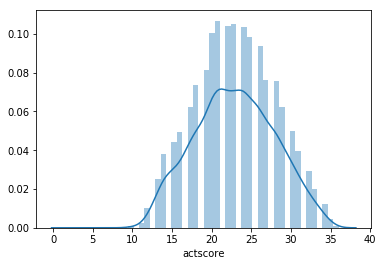

In [330]:
sns.distplot(export['actscore'][pd.notna(export['actscore'])]);
#normally distributed - good

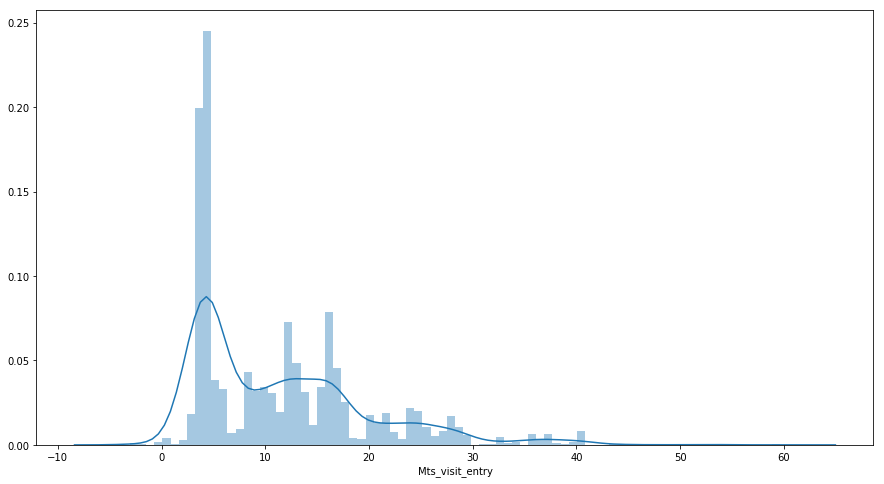

In [331]:
plt.figure(figsize=(15,8))
sns.distplot(freshmen['Mts_visit_entry'][pd.notna(freshmen['Mts_visit_entry'])], bins=80);
# A big peak at 5 and 6 months. Lower conversion rates elsewhere

In [332]:
export['Months_Visit_Entry'].value_counts(dropna=False)

Did Not Visit    630555
0 to 6             1341
13 to 18            857
7 to 12             559
More than 25        338
19 to 24            203
Name: Months_Visit_Entry, dtype: int64

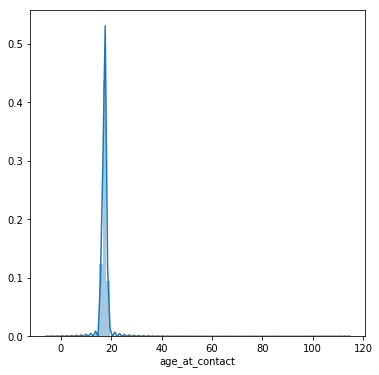

In [333]:
plt.figure(figsize=(6,6))
sns.distplot(freshmen['age_at_contact'][pd.notna(freshmen['age_at_contact'])], bins=80);

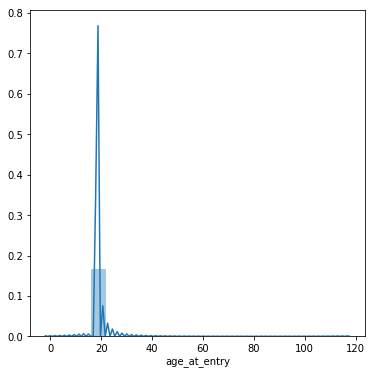

In [334]:
plt.figure(figsize=(6,6))
sns.distplot(freshmen['age_at_entry'][pd.notna(freshmen['age_at_entry'])], bins=20);

In [335]:
zip5 = pd.read_excel('../1_data/us-zip-code-latitude-and-longitude.xlsx')
zip5.head()

,zip5,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,71937,Cove,AR,34.398483,-94.39398,-6,1,"34.398483, -94.39398"
1,72044,Edgemont,AR,35.624351,-92.16056,-6,1,"35.624351, -92.16056"
2,56171,Sherburn,MN,43.660847,-94.74357,-6,1,"43.660847, -94.74357"
3,49430,Lamont,MI,43.010337,-85.89754,-5,1,"43.010337, -85.89754"
4,52585,Richland,IA,41.194129,-91.98027,-6,1,"41.194129, -91.98027"


In [337]:
zip5['zip5']=zip5['zip5'].astype('str')
zip5['zip_l']=zip5['zip5'].str.len()

In [338]:
zip5['zip_l'].value_counts()

5    39748
4     3213
3      230
Name: zip_l, dtype: int64

In [339]:
zip5 = zip5[['zip5', 'City', 'State', 'zip_l']]
zip5.head()

,zip5,City,State,zip_l
0,71937,Cove,AR,5
1,72044,Edgemont,AR,5
2,56171,Sherburn,MN,5
3,49430,Lamont,MI,5
4,52585,Richland,IA,5


In [340]:
export['zip5'] = export['zip5'].astype('str')

In [341]:
zip5['zip5'][zip5['zip_l']==4]='0'+zip5['zip5']
zip5['zip5'][zip5['zip_l']==3]='00'+zip5['zip5']
zip5['zip_l']=zip5['zip5'].str.len()
zip5['zip_l'].value_counts()

5    43191
Name: zip_l, dtype: int64

In [342]:
zip5 = zip5[['zip5', 'City', 'State']]
zip5.head()

,zip5,City,State
0,71937,Cove,AR
1,72044,Edgemont,AR
2,56171,Sherburn,MN
3,49430,Lamont,MI
4,52585,Richland,IA


In [343]:
#export.drop(['City', 'State'], axis=1, inplace=True)
export = export.merge(zip5, on='zip5', how='left')
export['idnumber'][pd.isna(export['City'])].count()

6511

In [344]:
export['idnumber'][(pd.isna(export['State'])) & (export['zip5']!='nan')].count()

6209

In [345]:
export[(pd.isna(export['State'])) & (export['zip5']!='nan')]

,idnumber,gender,withdrawflag,ethnicity,address_01_city,address_01_stateprovince,entryterm,academicmajor,highschoolceebcode,actscore,initialsourcecode,highschooldescription,firstsourceapp,applicationmethod,highschool,campusvisit,inquiry,applied,admitted,enrolled,religion,extracurricular,athlete,age_at_contact,dateofentry,age_at_entry,Months_Visit_Entry,contact_to_entry,zip5,City,State
54,308069299,M,N,Missing,Indian Land,SC,17 Fall,Missing,410775,NaN,PC&U,Indian Land High School,NaN,NaN,Indian Land High School (410775),0,1,0,0,0,Missing,0,0,17.131084,2017-08-01,18.434328,Did Not Visit,15.638925,29707,NaN,NaN
929,302674900,F,N,Missing,Buckeye,AZ,17 Fall,Missing,NaN,NaN,PC&U,NaN,NaN,NaN,Missing,0,1,0,0,0,Missing,0,0,17.769016,2017-08-01,18.727284,Did Not Visit,11.499209,85396,NaN,NaN
1030,594887915,F,N,Missing,Annapolis,MD,17 Fall,Missing,NaN,NaN,RNL,NaN,NaN,NaN,Missing,0,1,0,0,0,Missing,0,0,18.264578,2017-08-01,18.795732,Did Not Visit,6.373848,21409,NaN,NaN
1422,677333807,F,N,Missing,O Fallon,MO,17 Fall,Missing,263055,NaN,Joint Jesuit Recruitment,Saint Joseph Academy,NaN,NaN,Saint Joseph Academy (263055),0,1,0,0,0,Christian,0,0,NaN,2017-08-01,NaN,Did Not Visit,22.604160,63368,NaN,NaN
1976,897221453,F,N,Missing,Fresno,CA,17 Fall,Missing,050622,NaN,PC&U,Clovis East High School,NaN,NaN,Clovis East High School (050622),0,1,0,0,0,Missing,0,0,15.961998,2017-08-01,18.012690,Did Not Visit,24.608308,93737,NaN,NaN
3105,790489220,F,N,White,Annapolis,MD,17 Fall,Missing,210011,NaN,NRCCUA,Broadneck Senior High School,NaN,NaN,Broadneck Senior High School (210011),0,1,0,0,0,Missing,0,0,16.939431,2017-08-01,17.873057,Did Not Visit,11.203515,21409,NaN,NaN
3152,154513110,M,N,Black or African American,Fort Gaines,GA,17 Fall,Missing,110940,NaN,PC&U,Randolph-Clay High School,NaN,NaN,Randolph-Clay High School (110940),0,1,0,0,0,Christian,0,0,16.172817,2017-08-01,18.415163,Did Not Visit,26.908150,39851,NaN,NaN
3309,728279844,F,N,Missing,Edinburg,TX,17 Fall,Missing,440062,NaN,Group Tour- On Campus,Idea Academy And College Preparatory: Alamo,NaN,NaN,Idea Academy And College Preparatory: Alamo (4...,0,1,0,0,0,Christian,0,0,16.610882,2017-08-01,18.809421,Did Not Visit,26.382472,78542,NaN,NaN
3409,578868578,F,N,Missing,Burlington,VT,17 Fall,Missing,NaN,NaN,Cappex,NaN,NaN,NaN,Missing,0,1,0,0,0,Missing,0,0,17.339165,2017-08-01,18.639671,Did Not Visit,15.606070,05408,NaN,NaN
3466,55215910,M,N,Missing,Richland,WA,17 Fall,Missing,NaN,NaN,PC&U,NaN,NaN,NaN,Missing,0,1,0,0,0,Missing,0,0,16.282333,2017-08-01,18.448017,Did Not Visit,25.988213,99354,NaN,NaN


In [346]:
export['enrolled'][(pd.isna(export['State'])) & (export['zip5']!='nan')].sum()

15

In [347]:
export['admitted'][(pd.isna(export['State'])) & (export['zip5']!='nan')].sum()

79

In [348]:
export['City'][pd.isna(export['City'])] = export['address_01_city']
export['State'][pd.isna(export['State'])] = export['address_01_stateprovince']
print(export['idnumber'][(pd.isna(export['State'])) & (export['zip5']!='nan')].count())
print(export['idnumber'][(pd.isna(export['City'])) & (export['zip5']!='nan')].count())

17
3


In [349]:
export.drop(['address_01_city', 'address_01_stateprovince'], axis = 1, inplace = True)
export.head()

,idnumber,gender,withdrawflag,ethnicity,entryterm,academicmajor,highschoolceebcode,actscore,initialsourcecode,highschooldescription,firstsourceapp,applicationmethod,highschool,campusvisit,inquiry,applied,admitted,enrolled,religion,extracurricular,athlete,age_at_contact,dateofentry,age_at_entry,Months_Visit_Entry,contact_to_entry,zip5,City,State
0,251249480,Missing,N,Missing,17 Fall,Missing,NaN,NaN,NRCCUA,NaN,NaN,NaN,Missing,0,1,0,0,0,Missing,0,0,18.111255,2017-08-01,19.044881,Did Not Visit,11.203515,16823,Bellefonte,PA
1,182423288,F,N,Missing,17 Fall,Missing,250465,18.0,ACT,Pearl River Central High School,NaN,NaN,Pearl River Central High School (250465),0,1,0,0,0,Missing,0,0,17.862105,2017-08-01,19.110591,Did Not Visit,14.981827,39466,Picayune,MS
2,953769515,F,N,White,17 Fall,Missing,NaN,NaN,NRCCUA,NaN,NaN,NaN,Missing,0,1,0,0,0,Missing,0,0,17.073588,2017-08-01,18.007214,Did Not Visit,11.203515,78665,Sandy,TX
3,540683149,M,N,Hispanic of any race,17 Fall,Missing,445856,NaN,NRCCUA,Foster High School,NaN,NaN,Foster High School (445856),0,1,0,0,0,Missing,0,0,17.689617,2017-08-01,18.623243,Did Not Visit,11.203515,77406,Richmond,TX
4,98836834,F,N,Black or African American,17 Fall,Missing,NaN,NaN,NRCCUA,NaN,NaN,NaN,Missing,0,1,0,0,0,Missing,0,0,16.375422,2017-08-01,17.922339,Did Not Visit,18.563010,75052,Grand Prairie,TX


In [358]:
export['age_at_contact'].describe(percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995]) 
#keep between 15 and 20

count    602708.000000
mean         17.312936
std           1.165008
min          -5.987803
5%           15.866171
10%          16.238526
25%          16.786108
50%          17.385709
75%          17.884009
90%          18.256364
95%          18.450755
99%          19.009288
99.5%        19.258438
max         114.562243
Name: age_at_contact, dtype: float64

In [360]:
export['age_at_entry'].describe(percentiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995]) 
#keep between 17 and 21

count    607408.000000
mean         18.456397
std           0.939180
min          -1.894632
1%           17.451419
5%           17.842940
10%          17.944243
25%          18.135896
50%          18.428852
75%          18.713594
90%          18.921675
95%          19.198204
99%          19.833398
99.5%        20.183755
max         117.568465
Name: age_at_entry, dtype: float64

In [362]:
export['contact_to_entry'].describe(percentiles = [0.001, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995]) 
#keep between 2 and 40

count    628610.000000
mean         13.648694
std           8.052256
min           0.000000
0.1%          2.628391
5%            3.482618
10%           6.373848
25%           6.373848
50%          11.203515
75%          18.365880
90%          25.265406
95%          28.715169
99%          35.611737
99.5%        40.247233
max         249.434280
Name: contact_to_entry, dtype: float64

In [374]:
export['applicationmethod'].value_counts(dropna=False)

NaN                   618720
Common Application     12834
Slate Application       2299
Name: applicationmethod, dtype: int64

In [363]:
export.to_excel('../3_res/Tableau.xlsx', index=False)